# Linear Regression Steps -> Calories
First I try to predict the calories with Linear Regression with just one feature Linear Regression (which doesn't make sense of course because there are so many more features to consider)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# read data
path_to_data= "../data/raw/MTurkData/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"
fitbit_4_12_16_daily_activity = pd.read_csv(path_to_data)

# Just get steps and calories
fitbit_id_steps_calories = pd.concat([fitbit_4_12_16_daily_activity["Id"], 
           fitbit_4_12_16_daily_activity["TotalSteps"], 
           fitbit_4_12_16_daily_activity["Calories"]],
        axis=1)

# X = Steps
X_steps = fitbit_id_steps_calories["TotalSteps"]

# y = calories 
y_calories = fitbit_id_steps_calories["Calories"]

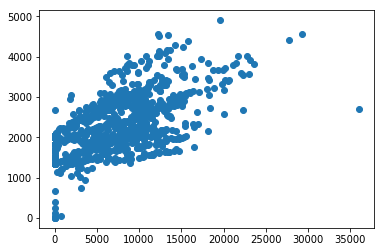

In [8]:
# Plot the basic data
plt.scatter(X_steps, y_calories);

You can see that it is hard to predict data with just a straight line

In [15]:
# Split the set into test and train 70% train / 30% test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_steps, y_calories, random_state=1, test_size=0.3)

In [19]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [20]:
# Adding one dimension to the train and test set
Xtrain = Xtrain[:, np.newaxis]
Xtest = Xtest[:, np.newaxis]

In [23]:
# Train the model
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Predict on validation set
y_prediction = model.predict(Xtest)

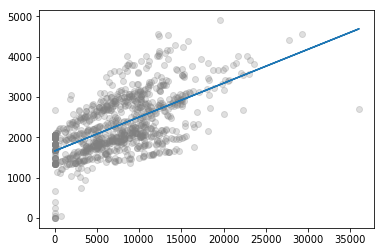

In [32]:
# Plot the linear line and tha actual data
plt.scatter(X_steps, y_calories, alpha=0.25, color="gray");
plt.plot(Xtest, y_prediction);
plt.xticks()
plt.yticks();

Example prediction for 10.000 steps

In [35]:
steps = 10000
pred_10k = model.predict(steps)
print("With {} steps you have a calorie consumption of {} calories".format(steps, int(pred_10k)))

With 10000 steps you have a calorie consumption of 2499 calories


## Model Accuracy
I'll try to get the accuracy with the ``mean_absolute_error``

In [37]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, y_prediction)
print("In average the model is {} calories +/- wrong".format(int(MAE)))

In average the model is 462 calories +/- wrong
